In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from collections import defaultdict


In [14]:
# Dataset path
data_path = Path("../../data/processed/01_final_dataset")

# Read dataset_split.csv
split_df = pd.read_csv(data_path / "dataset_split.csv")

print(f"Dataset path: {data_path}")
print(f"Number of images: {len(split_df)}")

# Split distribution
split_counts = split_df['split'].value_counts()
print("\nDistribution")
print(split_counts)

Dataset path: ..\..\data\processed\01_final_dataset
Number of images: 147116

Distribution
split
train    102951
test      22129
val       22036
Name: count, dtype: int64



Top 10:
class_name
ice_cream            1048
club_sandwich        1044
omelette             1032
french_fries         1009
baklava              1002
mussels               998
french_toast          700
foie_gras             700
fish_and_chips        700
breakfast_burrito     700
Name: count, dtype: int64

Bottom 10:
class_name
tomato_paste        230
cheese_pie          229
meat_pie            228
fig                 228
brussels_sprouts    226
banana              219
turkish_coffe       219
yoghurt_pasta       212
zucchini_patties    212
cauliflower         207
Name: count, dtype: int64


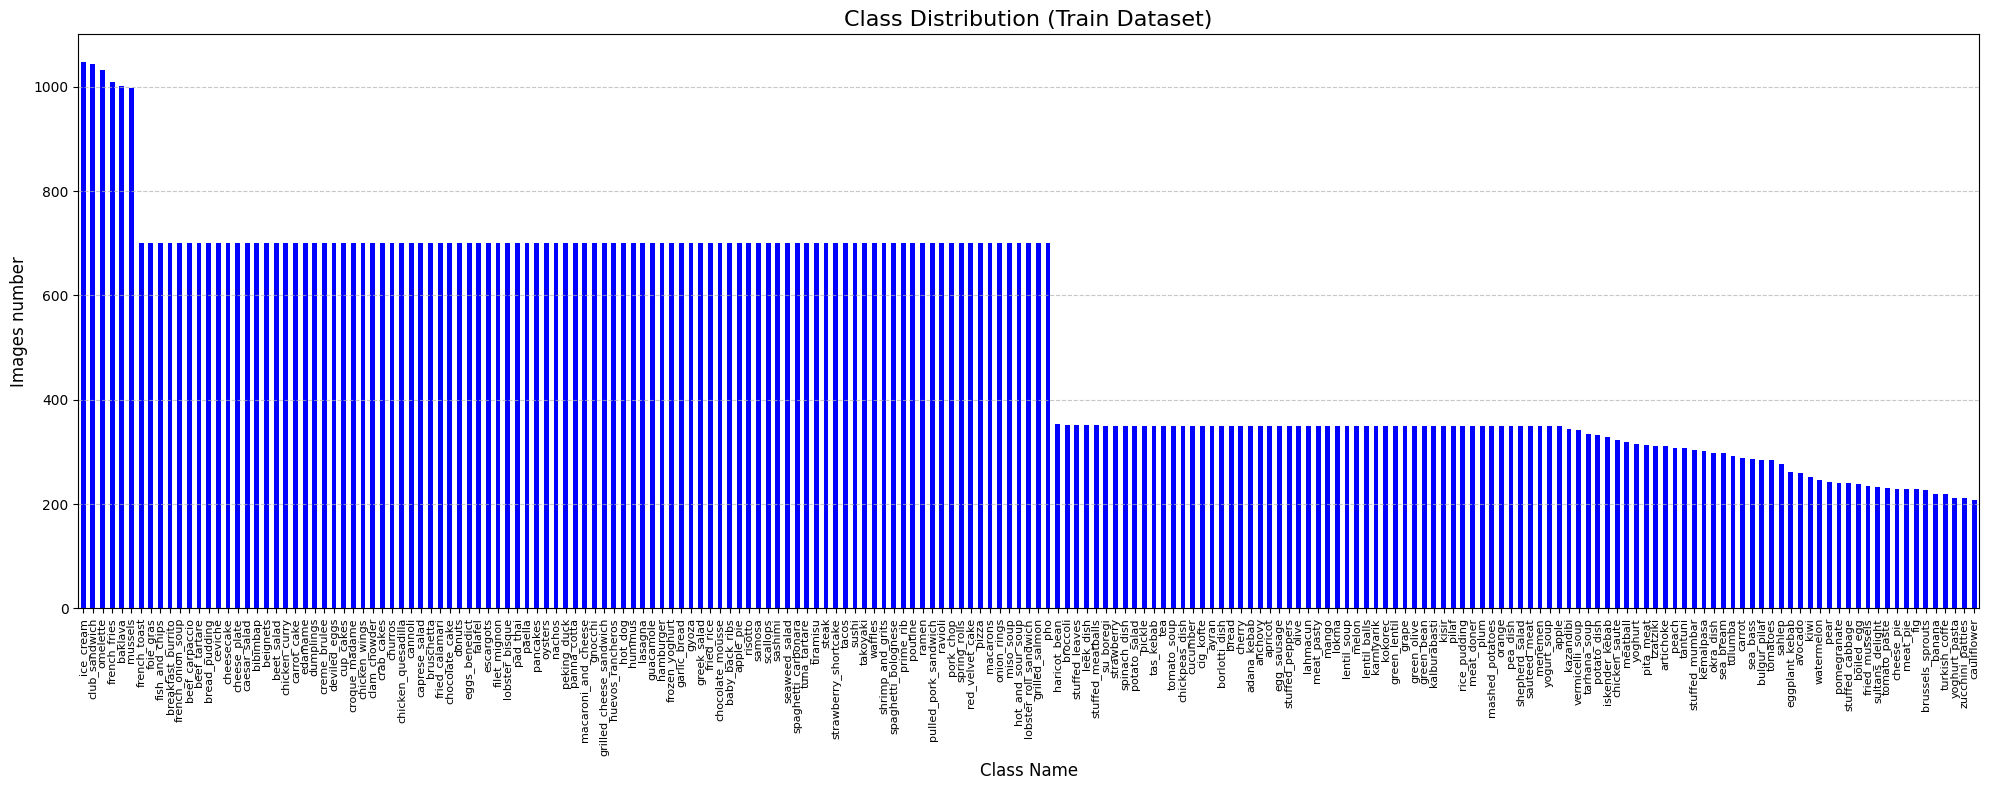

In [15]:
# Class distribution in trainset
train_df = split_df[split_df['split'] == 'train']
class_counts = train_df['class_name'].value_counts()

print("\nTop 10:")
print(class_counts.head(10))

print("\nBottom 10:")
print(class_counts.tail(10))

# Visualize distribution
plt.figure(figsize=(20,8))
class_counts.plot(kind='bar', color='blue')
plt.title('Class Distribution (Train Dataset)', fontsize=16)
plt.xlabel('Class Name',fontsize=12)
plt.ylabel('Images number',fontsize=12)
plt.xticks(rotation=90,fontsize=8)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
"""
ice_cream            1048
club_sandwich        1044
omelette             1032
french_fries         1009
baklava              1002
mussels               998

These are combination of food-101 and turkish-food

Classes with less than 400 images belong to the turkish-food class.
"""

'\nice_cream            1048\nclub_sandwich        1044\nomelette             1032\nfrench_fries         1009\nbaklava              1002\nmussels               998\n\nThese are combination of food-101 and turkish-food\n\nClasses with less than 400 images belong to the turkish-food class.\n'

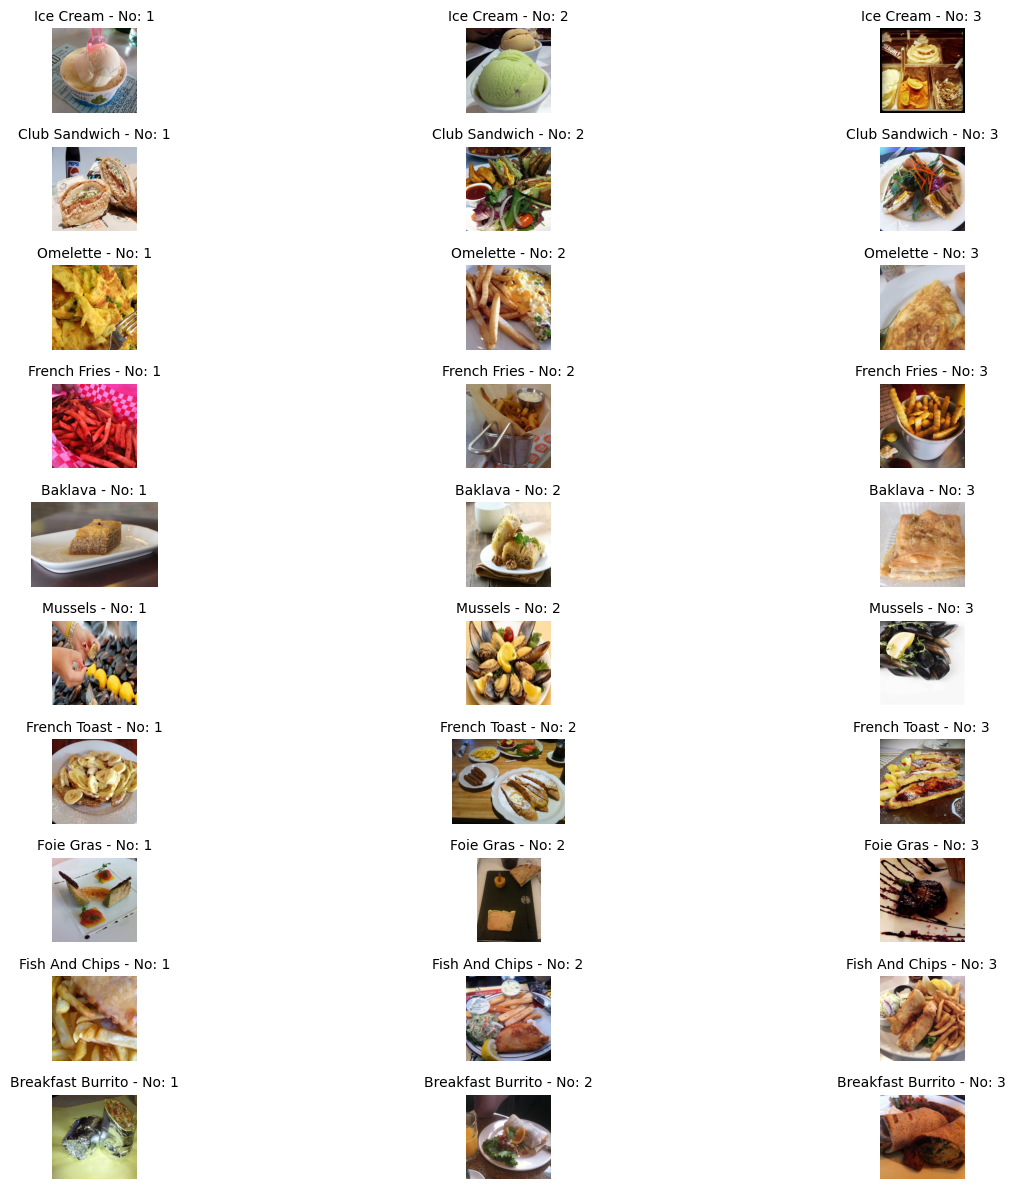

In [21]:
# Show 3 images each classes
num_perclass = 3
classes_to_show = class_counts.index.tolist()[:10] # Top 10 classes

plt.figure(figsize=(15,12))



for i, class_name in enumerate(classes_to_show):
    # Filter and randomly select images of the relevant class
    class_images = train_df[train_df['class_name'] == class_name].sample(num_perclass)

    for j, (index,row) in enumerate(class_images.iterrows()):
        plt.subplot(len(classes_to_show), num_perclass, i * num_perclass + j + 1)

        # Image path
        img_relative_path = Path(row['file_path'])

        # Just train/../.. part
        img_path_end = Path(*img_relative_path.parts[3:])

        img_path = data_path / img_path_end


        image = Image.open(img_path).convert('RGB')

        plt.imshow(image)
        plt.title(f"{class_name.replace('_',' ').title()} - No: {j + 1}", fontsize=10)
        plt.axis('off')
plt.tight_layout()
plt.show()